# Introduction to Tensors
*   Reference: tensorflow tutorial
* <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/tensor"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>


In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import numpy as np
import matplotlib.pyplot as plt

print(" tensorflow: {} \n numpy: {}".format(tf.__version__, np.__version__))
print(" Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print()
device_lib.list_local_devices()

 tensorflow: 2.4.0 
 numpy: 1.19.5
 Num GPUs Available:  2



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8459232737213484782,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 184090624
 locality {
   bus_id: 1
   links {
     link {
       device_id: 1
       type: "StreamExecutor"
       strength: 1
     }
   }
 }
 incarnation: 2194577803282974441
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1",
 name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 10523229568
 locality {
   bus_id: 1
   links {
     link {
       type: "StreamExecutor"
       strength: 1
     }
   }
 }
 incarnation: 2834997162226069030
 physical_device_desc: "device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"]

# 텐서(Tensor)

Tensors are multi-dimensional arrays with a uniform type (called a `dtype`).  You can see all supported `dtypes` at `tf.dtypes.DType`.

If you're familiar with [NumPy](https://numpy.org/devdocs/user/quickstart.html), tensors are (kind of) like `np.arrays`.

All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.


## 기초(Basics)
#### 텐서의 자료형
The following DType objects are defined:
* <table class="tfo-notebook-buttons" align="left">
  <td>
* `tf.float16`: 16-bit half-precision floating-point.
* `tf.float32`: 32-bit single-precision floating-point.
* `tf.float64`: 64-bit double-precision floating-point.
* `tf.bfloat16`: 16-bit truncated floating-point.
* `tf.complex64`: 64-bit single-precision complex.
* `tf.complex128`: 128-bit double-precision complex.
* `tf.int8`: 8-bit signed integer.
* `tf.uint8`: 8-bit unsigned integer.
* `tf.uint16`: 16-bit unsigned integer.
* `tf.uint32`: 32-bit unsigned integer.
* `tf.uint64`: 64-bit unsigned integer.
  </td>
  <td>
* `tf.int16`: 16-bit signed integer.
* `tf.int32`: 32-bit signed integer.
* `tf.int64`: 64-bit signed integer.
* `tf.bool`: Boolean.
* `tf.string`: String.
* `tf.qint8`: Quantized 8-bit signed integer.
* `tf.quint8`: Quantized 8-bit unsigned integer.
* `tf.qint16`: Quantized 16-bit signed integer.
* `tf.quint16`: Quantized 16-bit unsigned integer.
* `tf.qint32`: Quantized 32-bit signed integer.
* `tf.resource`: Handle to a mutable resource.
* `tf.variant`: Values of arbitrary types.
  </td>



### 텐서 생성

In [2]:
m1 = [[1.0, 2.0], 
      [3.0, 4.0]]
m2 = np.array([[1.0, 2.0],
              [3.0, 4.0]], dtype=np.float32)
m3 = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])

In [3]:
print(type(m1))
print(type(m2))
print(type(m3))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [4]:
t1 = tf.convert_to_tensor(m1, dtype=tf.float32)
t2 = tf.convert_to_tensor(m2, dtype=tf.float32)
t3 = tf.convert_to_tensor(m3, dtype=tf.float32)

In [5]:
print(type(t1))
print(type(t2))
print(type(t3))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


### Numpy Compatibility

In [6]:
ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())
ndarray

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Constants

In [7]:
hello = tf.constant("Hello World!")
print(hello)

tf.Tensor(b'Hello World!', shape=(), dtype=string)


In [8]:
a = tf.constant(1.5)
b = tf.constant(2.5)
print(a.numpy())
print(b)

1.5
tf.Tensor(2.5, shape=(), dtype=float32)


### Variables

In [9]:
weight = tf.Variable(tf.random_normal_initializer(stddev=0.1)([5, 2]))
print(weight)

<tf.Variable 'Variable:0' shape=(5, 2) dtype=float32, numpy=
array([[ 0.00792881, -0.04499583],
       [-0.16934025, -0.00650953],
       [-0.12351459, -0.08210347],
       [ 0.03231116,  0.06656463],
       [-0.0175769 ,  0.0299921 ]], dtype=float32)>


### Tensor Shape


Here is a "scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".

In [10]:
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


A "vector" or "rank-1" tensor is like a list of values. A vector has 1-axis:

In [11]:
# Let's make this a float tensor.
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


A "matrix" or "rank-2" tensor has 2-axes:

In [12]:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


<table>
<tr>
  <th>A scalar, shape: <code>[]</code></th>
  <th>A vector, shape: <code>[3]</code></th>
  <th>A matrix, shape: <code>[3, 2]</code></th>
</tr>
<tr>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/scalar.png?raw=1" alt="A scalar, the number 4" />
  </td>

  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/vector.png?raw=1" alt="The line with 3 sections, each one containing a number."/>
  </td>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/matrix.png?raw=1" alt="A 3x2 grid, with each cell containing a number.">
  </td>
</tr>
</table>


### 텐서의 축(axis)
Tensors may have more axes, here is a tensor with 3-axes:

In [13]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


There are many ways you might visualize a tensor with more than 2-axes.

<table>
<tr>
  <th colspan=3>A 3-axis tensor, shape: <code>[3, 2, 5]</code></th>
<tr>
<tr>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_numpy.png?raw=1"/>
  </td>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_front.png?raw=1"/>
  </td>

  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_block.png?raw=1"/>
  </td>
</tr>

</table>

### 원 자료형태로 복귀
You can convert a tensor to a NumPy array either using `np.array` or the `tensor.numpy` method:

In [14]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [15]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

### 랜덤 텐서 생성하기



*   `tf.random.set_seed`: 동일한 결과를 만들도록 seed 고정
*   `tf.random.normal`: 정규분포로부터 랜덤 텐서 생성
*   `tf.random.uniform`: 균일분포로부터 랜덤 텐서 생성







In [16]:
tf.random.set_seed(5)
tf.random.normal(shape=[2,3],mean=0.0, stddev=1.0)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.18030666, -0.95028627, -0.03964049],
       [-0.7425406 ,  1.3231523 , -0.61854804]], dtype=float32)>

In [17]:
tf.random.uniform(shape=[2,3], minval=0, maxval=10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[7.0170746 , 0.43367863, 5.6045723 ],
       [1.2203383 , 2.7995849 , 0.75006604]], dtype=float32)>

In [18]:
tf.random.uniform(shape=[2,3], minval=0, maxval=10, dtype=tf.int32)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[9, 6, 5],
       [8, 1, 4]], dtype=int32)>

### 기존의 텐서크기와 같은 0 혹은 1 텐서 생성
* `tf.zeros`: 값이 0으로 채워진 텐서 생성
* `tf.ones`: 값이 1로 채워진 텐서 생성
* `tf.zeros_like`: 입력 텐서와 같은 크기, 타입의 값이 0으로 채워진 텐서 생성
* `tf.ones_like`: 입력 텐서와 같은 크기, 타입의 값이 1로 채워진 텐서 생성
* `tf.fill`: 특정 값으로 채워진 텐서 생성


In [19]:
tf.zeros(shape=[2,3])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [20]:
tf.ones(shape=[2,3])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [21]:
target_tensor = tf.zeros(shape=[3,4], dtype=tf.int32)
print(target_tensor)
print()
tf.zeros_like(input=target_tensor)

tf.Tensor(
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)



<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)>

In [22]:
target_tensor = tf.zeros(shape=[3,4])
print(target_tensor)
print()
tf.ones_like(input=target_tensor)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)



<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

### 텐서의 사칙연산

Tensors often contain floats and ints, but have many other types, including:

* complex numbers
* strings

The base `tf.Tensor` class requires tensors to be "rectangular"---that is, along each axis, every element is the same size.  However, there are specialized types of tensors that can handle different shapes:

* Ragged tensors (see [RaggedTensor](#ragged_tensors) below)
* Sparse tensors (see [SparseTensor](#sparse_tensors) below)

You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [23]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [24]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



Tensors are used in all kinds of operations (ops).

In [25]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


## 텐서의 차원(shape)

Tensors have shapes.  Some vocabulary:

* **Shape**: The length (number of elements) of each of the dimensions of a tensor.
* **Rank**: Number of tensor dimensions.  A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
* **Axis** or **Dimension**: A particular dimension of a tensor.
* **Size**: The total number of items in the tensor, the product shape vector


Note: Although you may see reference to a "tensor of two dimensions", a rank-2 tensor does not usually describe a 2D space.

Tensors and `tf.TensorShape` objects have convenient properties for accessing these:

In [26]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

<table>
<tr>
  <th colspan=2>A rank-4 tensor, shape: <code>[3, 2, 4, 5]</code></th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/shape.png?raw=1" alt="A tensor shape is like a vector.">
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/4-axis_block.png?raw=1" alt="A 4-axis tensor">
  </td>
  </tr>
</table>


In [27]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of dimensions:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of dimensions: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


While axes are often referred to by their indices, you should always keep track of the meaning of each. Often axes are ordered from global to local: The batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.

<table>
<tr>
<th>Typical axis order</th>
</tr>
<tr>
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/shape2.png?raw=1" alt="Keep track of what each axis is. A 4-axis tensor might be: Batch, Width, Height, Freatures">
  </td>
</tr>
</table>

### 인덱싱(Indexing)

### Single-axis indexing

TensorFlow follows standard Python indexing rules, similar to [indexing a list or a string in Python](https://docs.python.org/3/tutorial/introduction.html#strings), and the basic rules for NumPy indexing.

* indexes start at `0`
* negative indices count backwards from the end
* colons, `:`, are used for slices: `start:stop:step`


In [28]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


Indexing with a scalar removes the dimension:

In [29]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


Indexing with a `:` slice keeps the dimension:

In [30]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


### Multi-axis indexing

Higher rank tensors are indexed by passing multiple indices.

The single-axis exact same rules as in  the single-axis case apply to each axis independently.

Passing an integer for each index the result is a scalar.

In [31]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [32]:
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


You can index using any combination of integers and slices:

In [33]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



Here is an example with a 3-axis tensor:

In [34]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


<table>
<tr>
<th colspan=2>Selecting the last feature across all locations in each example in the batch </th>
</tr>
<tr>
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/index1.png?raw=1" alt="A 3x2x5 tensor with all the values at the index-4 of the last axis selected.">
  </td>
      <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/index2.png?raw=1" alt="The selected values packed into a 2-axis tensor.">
  </td>
</tr>
</table>

Helper Function

In [35]:
def draw_tensor(tensor, x):
    """tensor drawing"""
    tensor_length = tensor.shape[0]
    fig, axes = plt.subplots(tensor_length, 1, figsize=(5, 5))
    for k in range(tensor_length):
        print(k)
        print(tensor.numpy()[k])
        axes[k].matshow(tensor.numpy()[k], vmin=0, vmax=1, cmap='summer', alpha=0.5)
        for (i, j), z in np.ndenumerate(x.numpy()[k]):
            axes[k].text(j, i, '{:d}'.format(z), ha='center', va='center')
    plt.tight_layout()
    plt.show()

In [36]:
tf.random.set_seed(777)
x = tf.random.uniform(shape=[2,3,4], minval=0, maxval=10, dtype=tf.int32)
x

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[5, 0, 6, 7],
        [4, 6, 3, 4],
        [9, 9, 8, 8]],

       [[6, 0, 9, 8],
        [3, 7, 2, 5],
        [5, 6, 7, 5]]], dtype=int32)>

In [37]:
mask = tf.ones_like(x)
mask

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int32)>

assign function

In [38]:
try:
    mask[0,2,3].assign(0)
    print(mask)
except AttributeError as error_message:
    print("Error Message: ", error_message)

Error Message:  'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'


In [39]:
mask = tf.Variable(mask)
mask[0,2,3].assign(0)
print(mask)

<tf.Variable 'Variable:0' shape=(2, 3, 4) dtype=int32, numpy=
array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 0]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int32)>


0
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 0]]
1
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


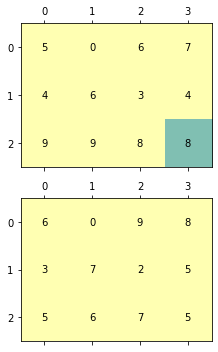

In [40]:
draw_tensor(mask, x)

## 텐서 차원 조작(Manipulating Shapes)

Reshaping a tensor is of great utility. 


In [41]:
# Shape returns a `TensorShape` object that shows the size on each dimension
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [42]:
# You can convert this object into a Python list, too
print(x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape. The `tf.reshape` operation is fast and cheap as the underlying data does not need to be duplicated.

In [43]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])

In [44]:
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.

In [45]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [46]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


If you flatten a tensor you can see what order it is laid out in memory.

In [47]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


Typically the only reasonable uses of `tf.reshape` are to combine or split adjacent axes (or add/remove `1`s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

In [48]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


<table>
<th colspan=3>
Some good reshapes.
</th>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-before.png?raw=1" alt="A 3x2x5 tensor">
  </td>
  <td>
  <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-good1.png?raw=1" alt="The same data reshaped to (3x2)x5">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-good2.png?raw=1" alt="The same data reshaped to 3x(2x5)">
  </td>
</tr>
</table>


Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

Swapping axes in `tf.reshape` does not work, you need `tf.transpose` for that. 


In [49]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# This doesn't work at all
try:
    tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
    print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


<table>
<th colspan=3>
Some bad reshapes.
</th>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad.png?raw=1" alt="You can't reorder axes, use tf.transpose for that">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad4.png?raw=1" alt="Anything that mixes the slices of data together is probably wrong.">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad2.png?raw=1" alt="The new shape must fit exactly.">
  </td>
</tr>
</table>

You may run across not-fully-specified shapes. Either the shape contains a `None` (a dimension's length is unknown) or the shape is `None` (the rank of the tensor is unknown).

Except for [tf.RaggedTensor](#ragged_tensors), such shapes will only occur in the context of TensorFlow's symbolic, graph-building  APIs:

* [tf.function](function.ipynb) 
* The [keras functional API](keras/functional.ipynb).


## More on `DTypes`

To inspect a `tf.Tensor`'s data type use the `Tensor.dtype` property.

When creating a `tf.Tensor` from a Python object you may optionally specify the datatype.

If you don't, TensorFlow chooses a datatype that can represent your data. TensorFlow converts Python integers to `tf.int32` and Python floating point numbers to `tf.float32`. Otherwise TensorFlow uses the same rules NumPy uses when converting to arrays.

You can cast from type to type.

In [50]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## 브로드캐스팅(Broadcasting)

Broadcasting is a concept borrowed from the [equivalent feature in NumPy](https://numpy.org/doc/stable/user/basics.html).  In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

The simplest and most common case is when you attempt to multiply or add a tensor to a scalar.  In that case, the scalar is broadcast to be the same shape as the other argument. 

In [51]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Likewise, 1-sized dimensions can be stretched out to match the other arguments.  Both arguments can be stretched in the same computation.

In this case a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. Note how the leading 1 is optional: The shape of y is `[4]`.

In [52]:
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


<table>
<tr>
  <th>A broadcasted add: a <code>[3, 1]</code> times a <code>[1, 4]</code> gives a <code>[3,4]</code> </th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/broadcasting.png?raw=1" alt="Adding a 3x1 matrix to a 4x1 matrix results in a 3x4 matrix">
  </td>
</tr>
</table>


Here is the same operation without broadcasting:

In [53]:
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


Most of the time, broadcasting is both time and space efficient, as the broadcast operation never materializes the expanded tensors in memory.  

You see what broadcasting looks like using `tf.broadcast_to`.

In [54]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


Unlike a mathematical op, for example, `broadcast_to` does nothing special to save memory.  Here, you are materializing the tensor.

It can get even more complicated.  [This section](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) of Jake VanderPlas's book _Python Data Science Handbook_ shows more broadcasting tricks (again in NumPy).

## tf.convert_to_tensor

Most ops, like `tf.matmul` and `tf.reshape` take arguments of class `tf.Tensor`.  However, you'll notice in the above case, Python objects shaped like tensors are accepted.

Most, but not all, ops call `convert_to_tensor` on non-tensor arguments.  There is a registry of conversions, and most object classes like NumPy's `ndarray`, `TensorShape`, Python lists, and `tf.Variable` will all convert automatically.

See `tf.register_tensor_conversion_function` for more details, and if you have your own type you'd like to automatically convert to a tensor.

### Create Dataset


In [55]:
a = np.arange(10)
print(a)
ds_tensors = tf.data.Dataset.from_tensor_slices(a)

[0 1 2 3 4 5 6 7 8 9]


In [56]:
ds_tensors = ds_tensors.map(tf.square).shuffle(20).batch(2)

In [57]:
print('Elements of ds_tensors:')
for _ in range(3):
    for x in ds_tensors:
        print(x)

Elements of ds_tensors:
tf.Tensor([ 9 25], shape=(2,), dtype=int64)
tf.Tensor([64  4], shape=(2,), dtype=int64)
tf.Tensor([ 1 16], shape=(2,), dtype=int64)
tf.Tensor([49  0], shape=(2,), dtype=int64)
tf.Tensor([81 36], shape=(2,), dtype=int64)
tf.Tensor([ 0 81], shape=(2,), dtype=int64)
tf.Tensor([25  4], shape=(2,), dtype=int64)
tf.Tensor([1 9], shape=(2,), dtype=int64)
tf.Tensor([36 16], shape=(2,), dtype=int64)
tf.Tensor([49 64], shape=(2,), dtype=int64)
tf.Tensor([ 1 81], shape=(2,), dtype=int64)
tf.Tensor([ 9 25], shape=(2,), dtype=int64)
tf.Tensor([36  0], shape=(2,), dtype=int64)
tf.Tensor([16 49], shape=(2,), dtype=int64)
tf.Tensor([ 4 64], shape=(2,), dtype=int64)
